# PCA ANALYSIS

In [1]:
# basics
import os, sys

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.config import default_region_reduced

# warnings
import warnings
warnings.filterwarnings('ignore')


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



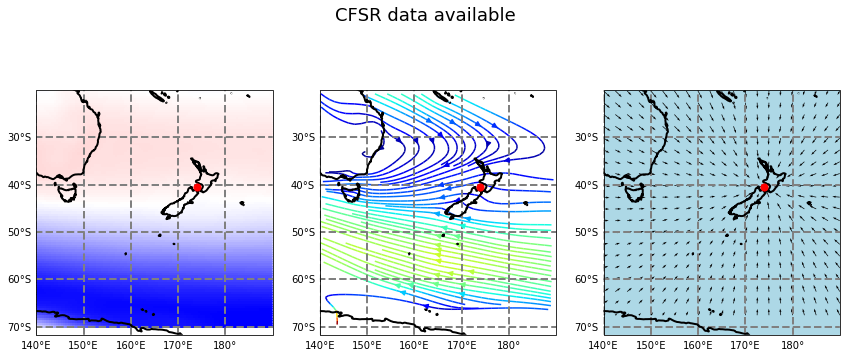


 loading the Moana v2 hindcast data... 



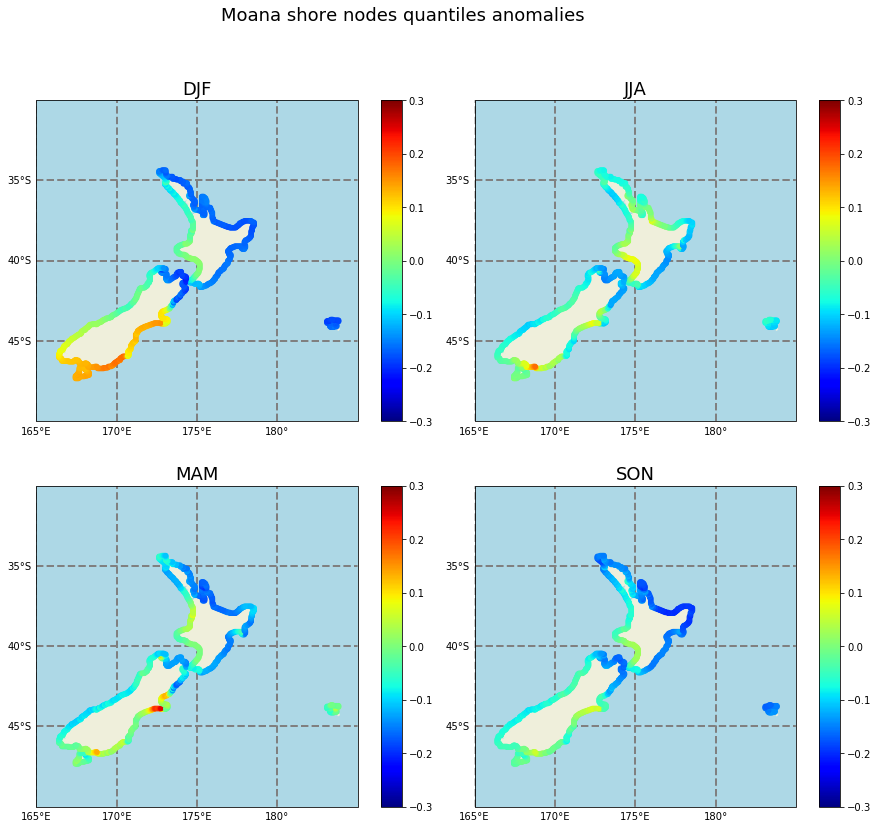


 loading and plotting the UHSLC tidal guages... 



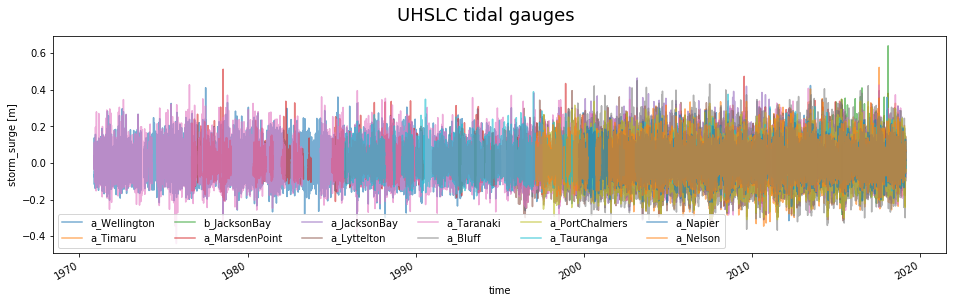

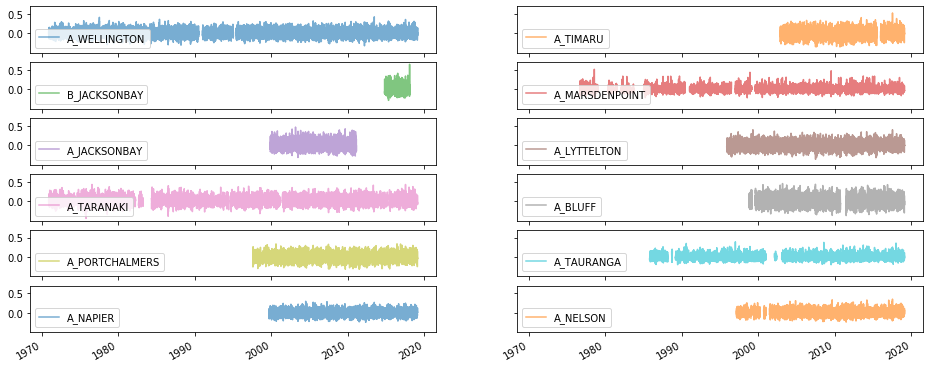

In [2]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)

In [3]:
load_cfsr_moana_uhslc.location

(173.9, -40.5)

## Regional PCs


 plotting 5 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



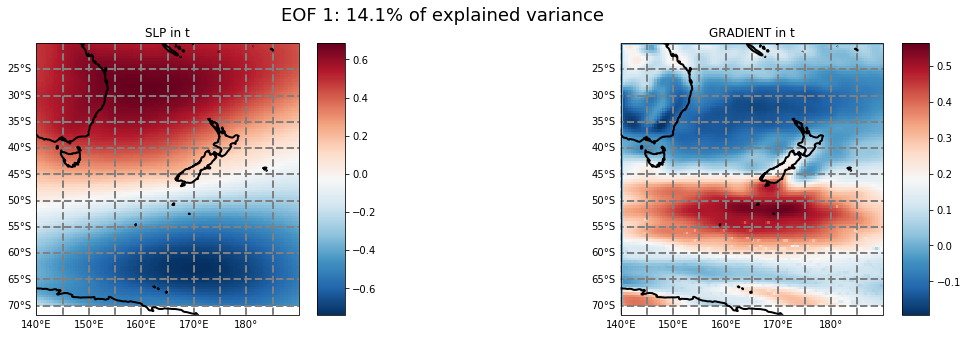

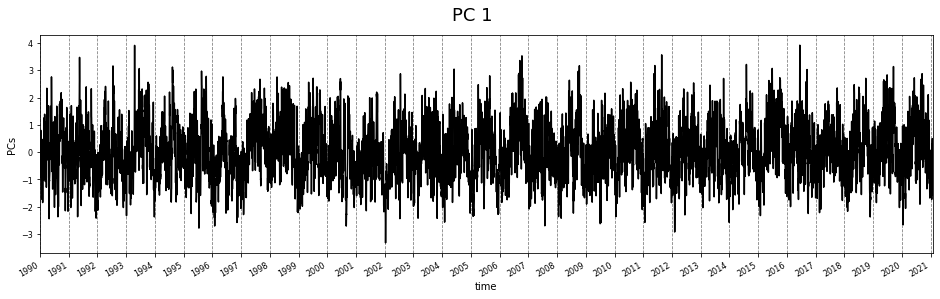

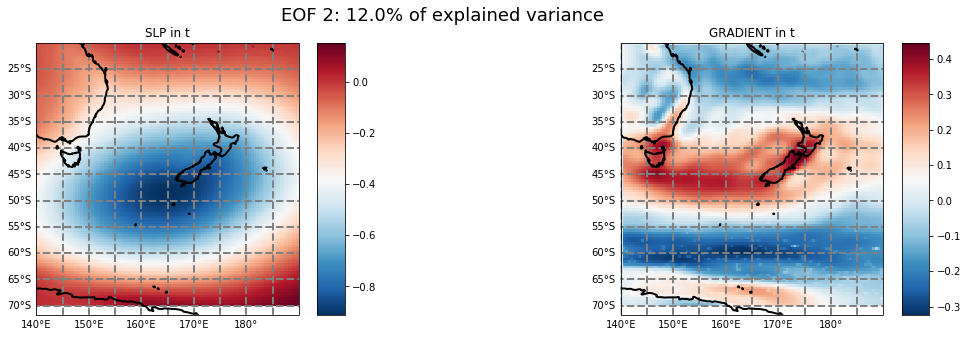

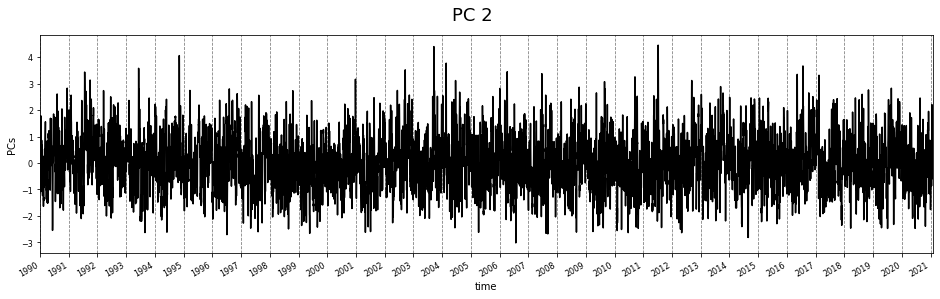

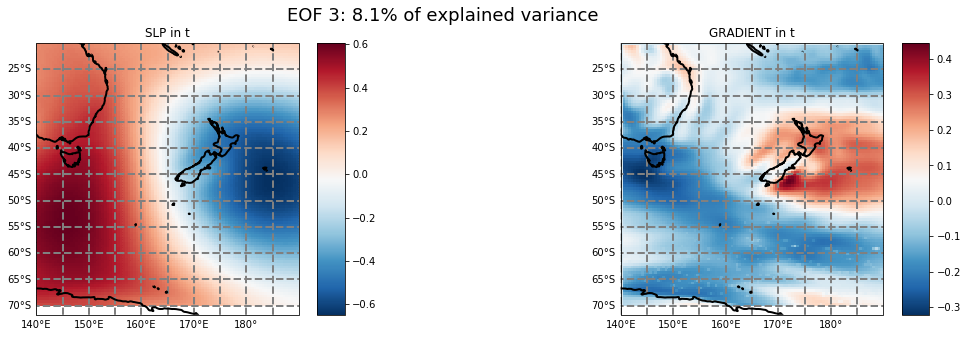

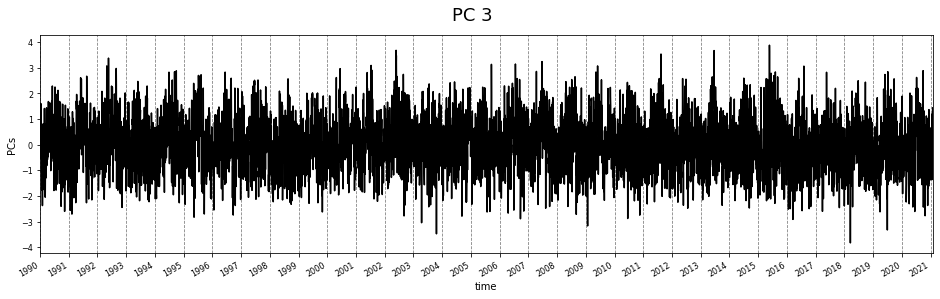

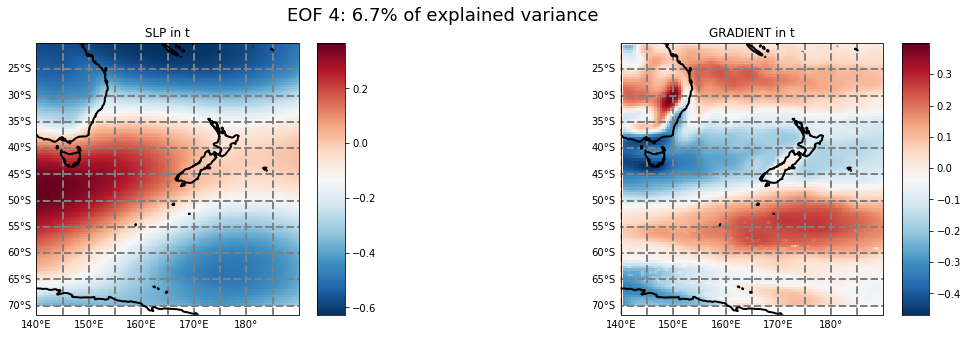

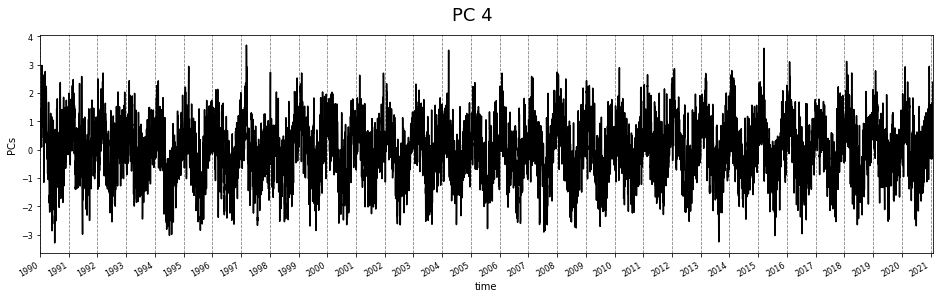

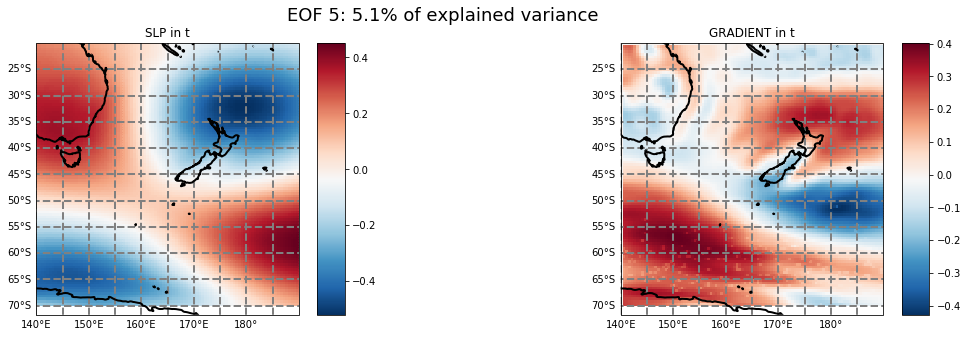

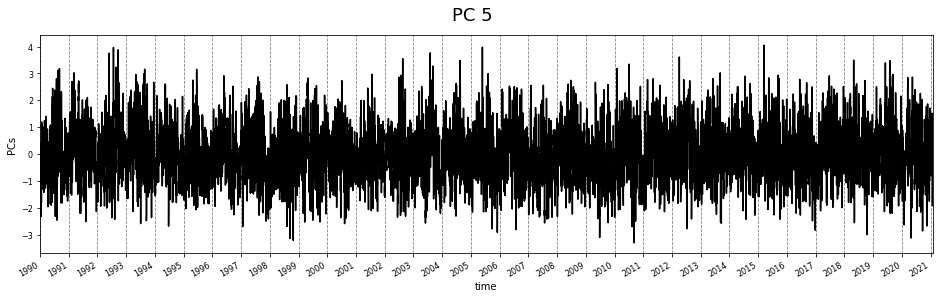

In [4]:
# load / calculate the regional pcs
if os.path.isfile('../data/cfsr/cfsr_regional_daily_pcs.nc'):
    import xarray as xr
    pcs_cfsr = xr.open_dataset(
        '../data/cfsr/cfsr_regional_daily_pcs.nc'
    )
    from sscode.plotting.pca import plot_pcs
    plot_pcs(pcs_cfsr,n_plot=5)

## Local PCs (with gradient)


 lets calculate the PCs... 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 17, 17) 


 calculated PCs matrix with shape: 
 (11352, 1156) 


 plotting 2 components with 4 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



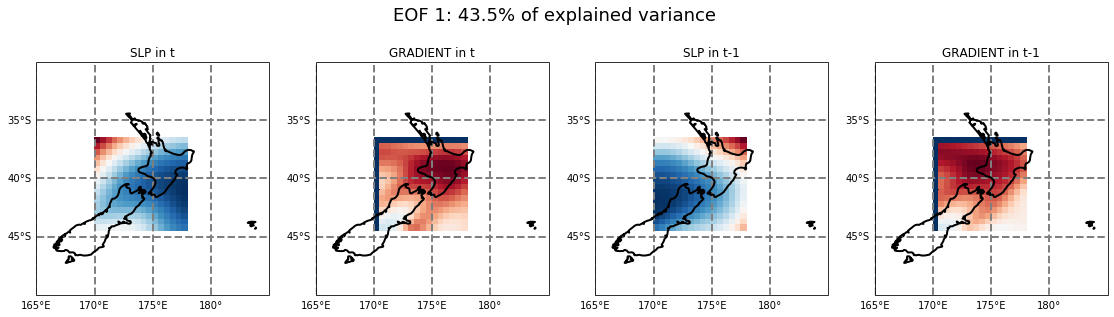

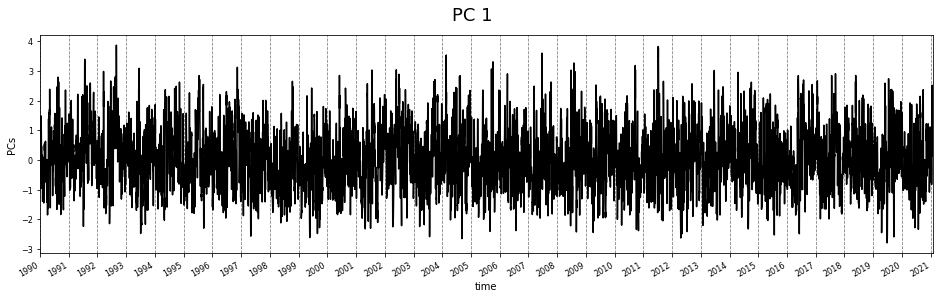

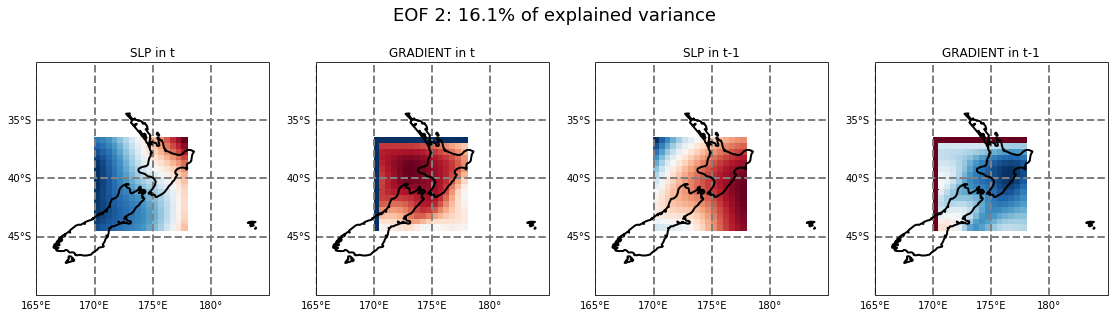

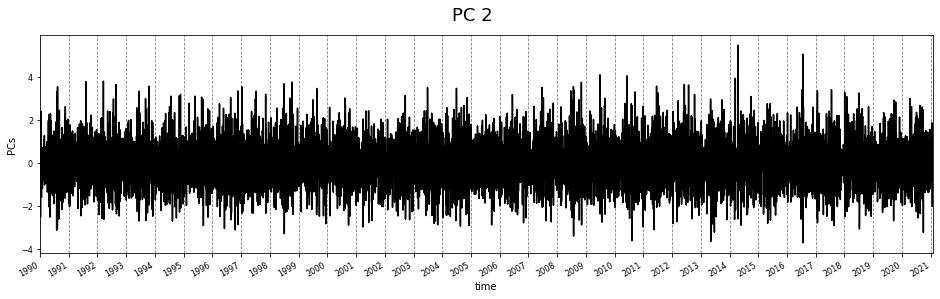


 plotting reconstruction of 4 EOFs... 


 being the EOFs the slp, the gradient, in steps t, t-1... 



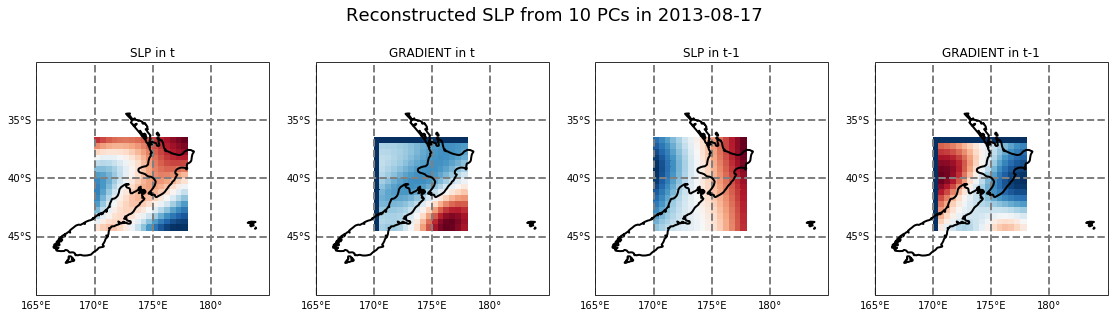

In [5]:
# calculate some local pcs
pcs_data, pcs_scaler = PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=True, time_lapse=2,
    region=(True,(
        load_cfsr_moana_uhslc.location[0]-4.1,
        load_cfsr_moana_uhslc.location[0]+4.1,
        load_cfsr_moana_uhslc.location[1]+4.1,
        load_cfsr_moana_uhslc.location[1]-4.1
    )),
    pca_plot=True
)
if True:
    from sscode.plotting.pca import plot_recon_pcs
    recon_slp = plot_recon_pcs(
        pcs_data,pcs_scaler,
        region=default_region_reduced,
        return_slp=True
    )

In [6]:
# TODO: plot REAL slp and recon_slp

## Local PCs (with wind)


 lets calculate the PCs... 


 adding the wind to the predictor... 


 winds predictor with shape: 
 (7670, 7, 7) 


 calculated PCs matrix with shape: 
 (7669, 98) 


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



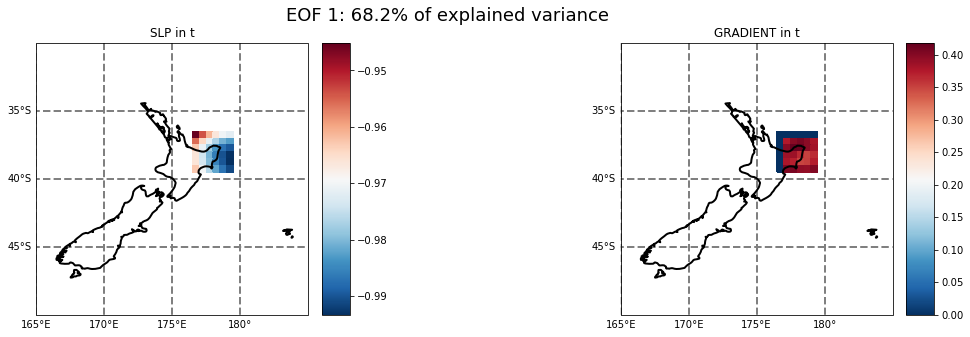

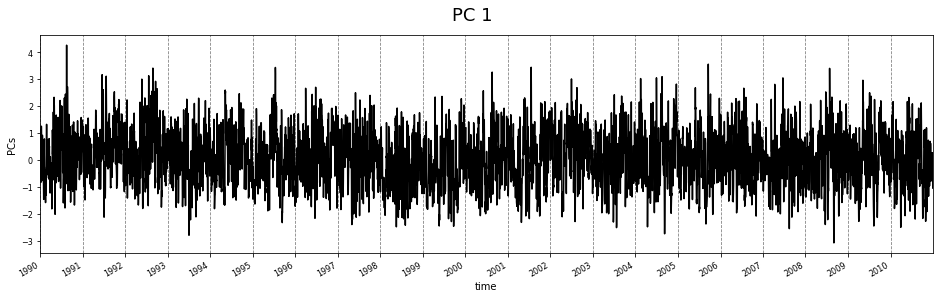

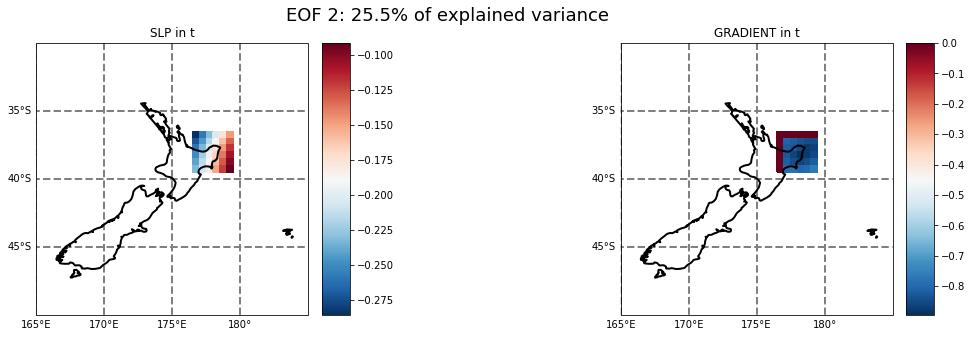

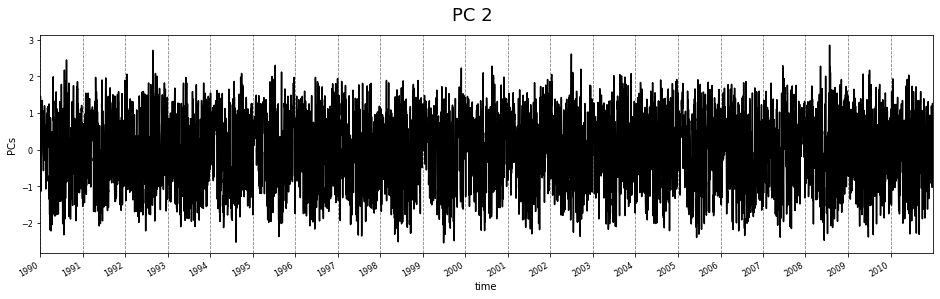

(<xarray.Dataset>
 Dimensions:   (n_components: 98, n_features: 98, n_lat: 7, n_lon: 7, time: 7669)
 Coordinates:
   * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2010-12-30
 Dimensions without coordinates: n_components, n_features, n_lat, n_lon
 Data variables:
     PCs       (time, n_components) float64 -3.139 4.235 ... -2.208e-17 -1.9e-21
     EOFs      (n_components, n_features) float64 -0.133 -0.1342 ... -0.0 -0.0
     variance  (n_components) float64 50.51 18.91 1.71 ... 4.56e-31 8.708e-41
     pcs_lon   (n_lon) float32 176.5 177.0 177.5 178.0 178.5 179.0 179.5
     pcs_lat   (n_lat) float32 -36.5 -37.0 -37.5 -38.0 -38.5 -39.0 -39.5,
 StandardScaler())

In [7]:
# more pcs in new location
new_location = (178,-38)
PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp.sel(time=slice('1990','2010')), 
    calculate_gradient=False,
    region=(True,(
        new_location[0]-1.6,new_location[0]+1.6,
        new_location[1]+1.6,new_location[1]-1.6
    )),
    winds=(True,load_cfsr_moana_uhslc.predictor_wind),
    pca_plot=True
)